In [67]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.ensemble import GradientBoostingRegressor as GBR


In [68]:
%matplotlib inline
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family ='NanumGothic')
plt.rcParams["axes.unicode_minus"] = False

In [69]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [70]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/체질검사.csv", engine='python',encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [71]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)


In [72]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (176, 13)
train data Y size: (176,)
test data X size: (76, 13)
test data Y size: (76,)


In [73]:
lr_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           4.38e-68
Time:                        17:18:10   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [74]:
dt_model = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_depth=4, random_state=1234)
dt_model.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

In [75]:
rf_model = RFR(n_estimators = 100, min_samples_leaf=6, min_samples_split=14, max_depth=4, random_state=1234)
rf_model.fit(df_train_x,df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [76]:
gb_model = GBR(n_estimators = 30, min_samples_leaf=11, min_samples_split=22, max_depth=4,learning_rate=0.1, random_state=1234)
gb_model.fit(df_train_x,df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [77]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8
                                , min_samples_split=20, max_depth=4)
dt_model.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(dt_model.score(df_train_x,\
                                                                    df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(dt_model.score(df_test_x,\
                                                                    df_test_y)))

# Random Forest
rf_model = RFR(random_state=1234, min_samples_leaf=6, n_estimators=100
                                , min_samples_split=14, max_depth=4)
rf_model.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_model.score(df_train_x,\
                                                                    df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_model.score(df_test_x,\
                                                                    df_test_y)))

Score on training set: 0.783
Score on test set: 0.570
Score on training set: 0.825
Score on test set: 0.627


In [78]:
models =["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

In [79]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

In [80]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [81]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [82]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

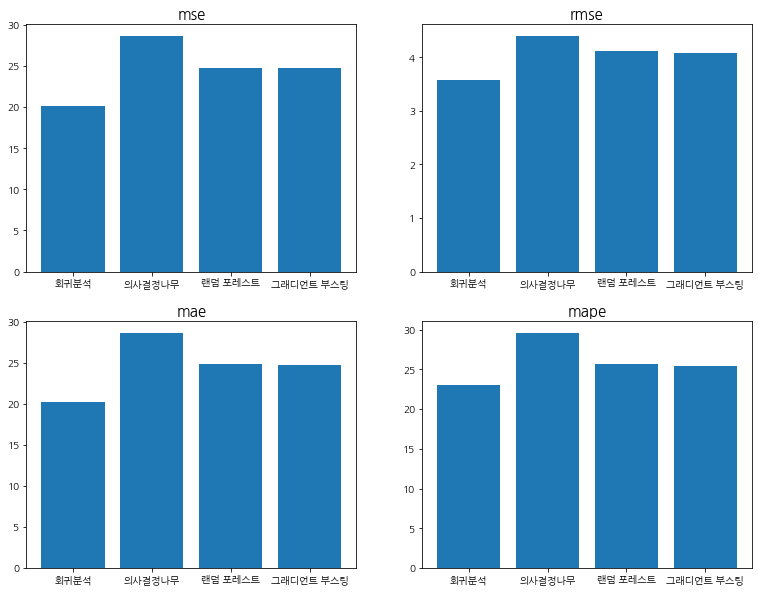

In [83]:
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, mae)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mse)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)


# 차원축소 
데이터를 수집했을 때 데이터의 변수가 많아 차원이 너무 큰 경우가 있다.
차원이 크면 공간이 커지고 데이터도 많이 필요하다.
차원의 저주 - 차원이 너무 크면 모델의 성능이 줄어든다.
탐색적 분석에 가까움 - 기술통계, 추론통계 , 주성분 분석

차원을 줄일 수 있는 방법
1. 주성분 분석 - 변수 간의 관계(공분산, 상관)를 기반으로 정보 손실을 최소화하면서 주요성분을 확인하고 차원을 축소하는 기법


In [84]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [85]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/직무능력평가.csv", engine='python')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [86]:
df_raw_x = df_raw.drop("EVAL", axis = 1)
df_raw_y = df_raw["EVAL"]
df_raw_y.head()

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

In [87]:
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


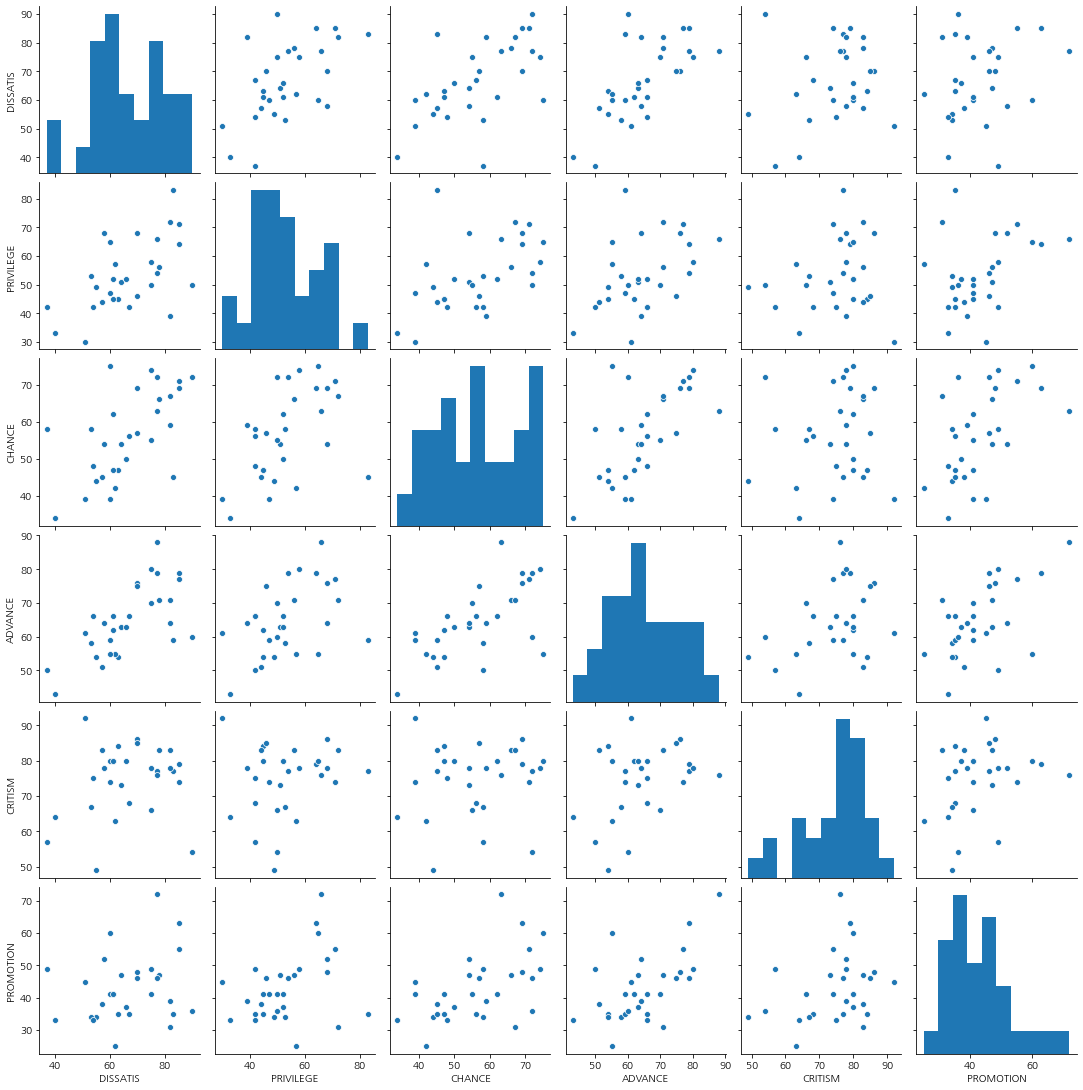

In [88]:
sns.pairplot(df_raw_x)

In [89]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [90]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [91]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print("Scaled Data:\n{}".format(nd_scaled[:5].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

Scaled Data:
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:
(30, 6)


In [92]:
df_scaled = pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [93]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [94]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:5]))
print("Shape:\n{}".format(nd_pca.shape))

PCA Data:
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape:
(30, 6)


In [95]:
#주성분 점수 저장 - 주성분수는 변수 수랑 같게
df_pca = pd.DataFrame(nd_pca, columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [96]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"]=[I for I in range(1,7)]
df_pca_stat["EigenValues"]= pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


적정 주성분 선택:
상관계수 기준(고유값>1) 2개
공분산 기준(고유값 누적비율 >0.8) 3개



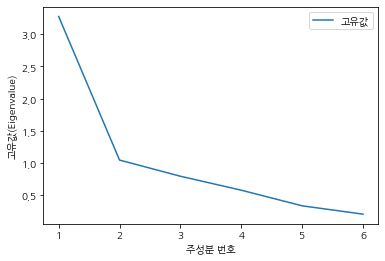

In [97]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValues"],label="고유값")

plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

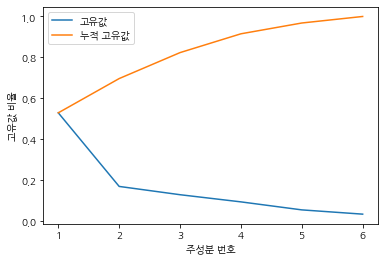

In [98]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"],label="고유값")

plt.plot(df_pca_stat["PrinNo"],
        df_pca_stat["CumEigenValueRatio"],label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [99]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                                                columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])],axis =1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


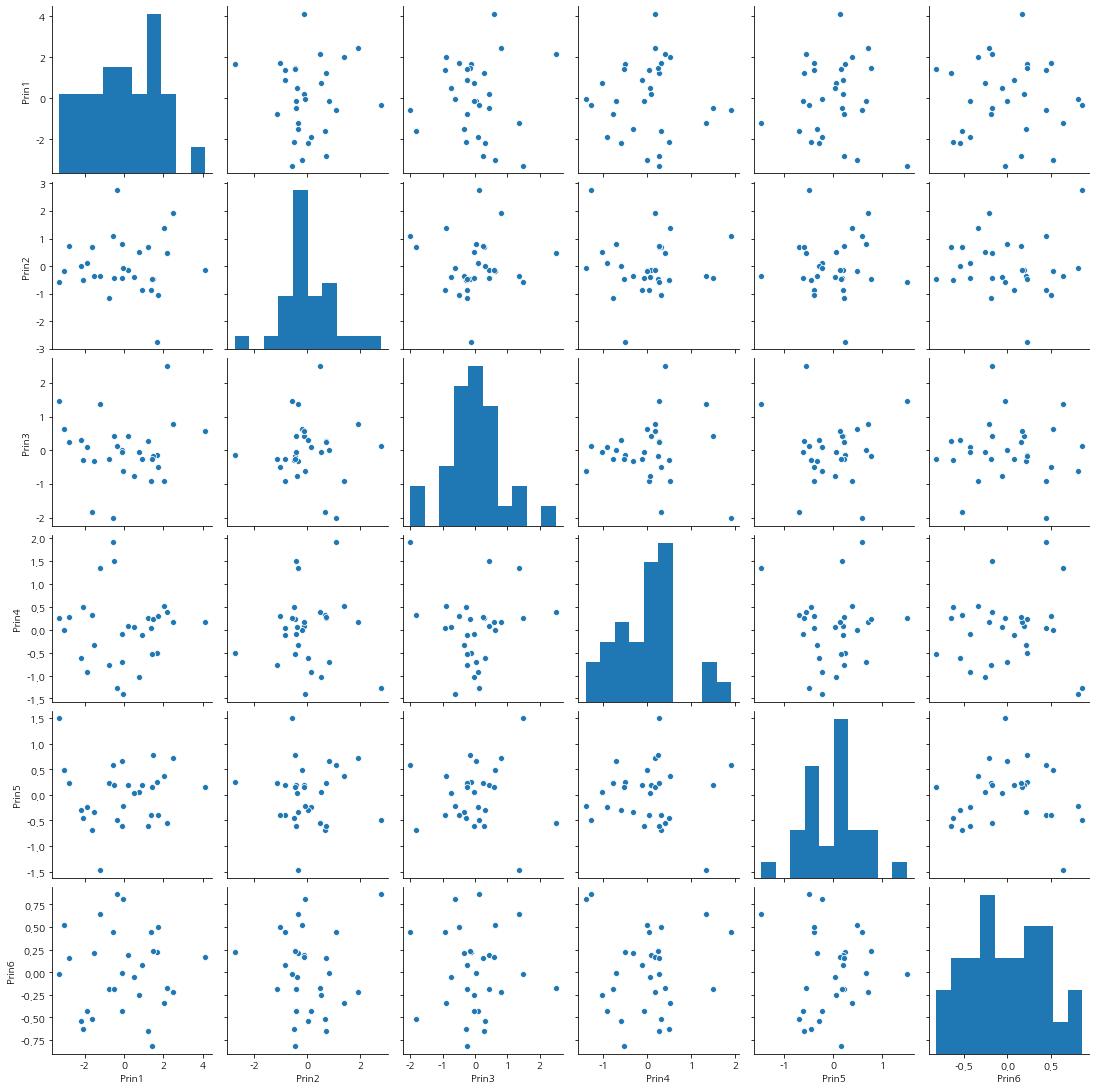

In [100]:
sns.pairplot(df_pca)


In [101]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


In [102]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.24e-05
Time:                        17:18:23   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [104]:
x_var = ["Prin1","Prin2","Prin3"]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.02e-05
Time:                        17:18:23   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

# 시계열 분석

In [105]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA



In [106]:
df_raw = pd.read_csv("/home/piai/bigdata/data/BigData/환율.csv", engine = 'python', parse_dates=["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [107]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CURRENCY       273 non-null    object        
 1   APPL_DATE      273 non-null    datetime64[ns]
 2   STD_RATE       273 non-null    float64       
 3   USD_CONV_DATE  273 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 8.7+ KB


In [108]:
df_raw_pivot = df_raw.pivot(index="APPL_DATE", columns = "CURRENCY", values = "STD_RATE")
df_raw_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<AxesSubplot:xlabel='APPL_DATE'>

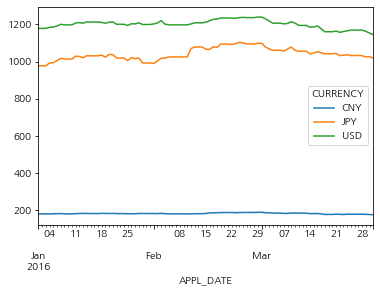

In [109]:
df_raw_pivot.plot()

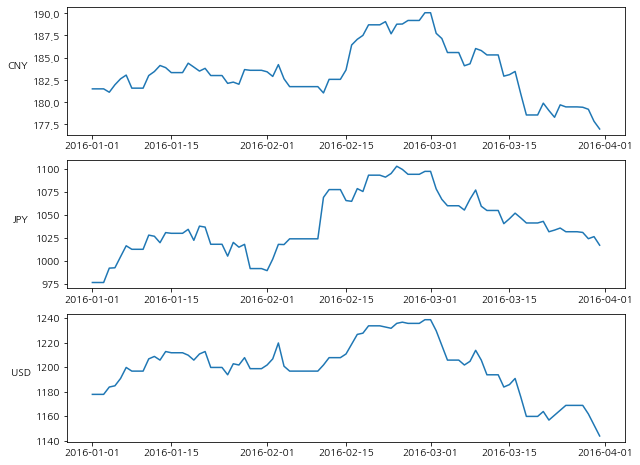

In [110]:
fig,(ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, figsize=(10,8))

for (ax,idx,currency) in zip([ax1,ax2,ax3], [311,312,313], ["CNY", "JPY", "USD"]):
    ax.plot("APPL_DATE", "STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    ax.set_ylabel(currency,rotation=0, labelpad = 15)

In [111]:
df_CNY = df_raw[df_raw["CURRENCY"]=='CNY'].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [112]:
train_size = 0.9
len_idx = len(df_CNY.index)
mask = (np.arange(len_idx)/ len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [122]:
df_CNY_train = df_CNY[df_CNY.index <= "2016-03-22"]
df_CNY_test = df_CNY[df_CNY.index > "2016-03-22"]
df_CNY_test.head()


,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


<AxesSubplot:xlabel='APPL_DATE'>

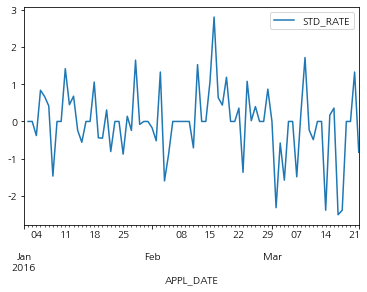

In [123]:
df_CNY_diff1 = df_CNY_train- df_CNY_train.shift(1)
df_CNY_diff1.plot()

<AxesSubplot:xlabel='APPL_DATE'>

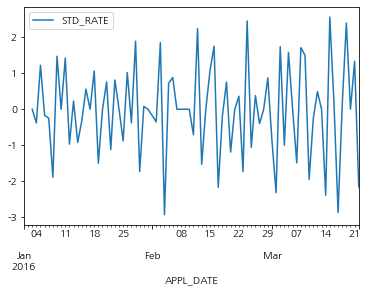

In [124]:
df_CNY_diff2 = df_CNY_train-2*(df_CNY_tain.shift(1))+(df_CNY_train.shift(2))
df_CNY_diff2.plot()

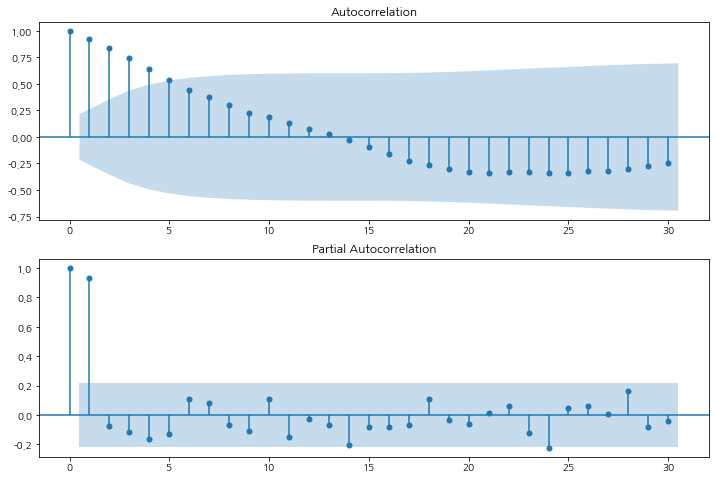

In [125]:
lag_size = 30
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train["STD_RATE"], lags= lag_size, ax = ax1)

ax2 = fig.add_subplot(212)
fig= plot_pacf(df_CNY_train["STD_RATE"], lags=lag_size, ax=ax2)

In [126]:
ts_model_cny = ARIMA(df_CNY_train, order=(1,2,0))
ts_result_cny = ts_model_cny.fit(trend="c",full_output = True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Wed, 18 Nov 2020   AIC                            253.025
Time:                        17:35:32   BIC                            260.171
Sample:                    01-03-2016   HQIC                           255.890
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


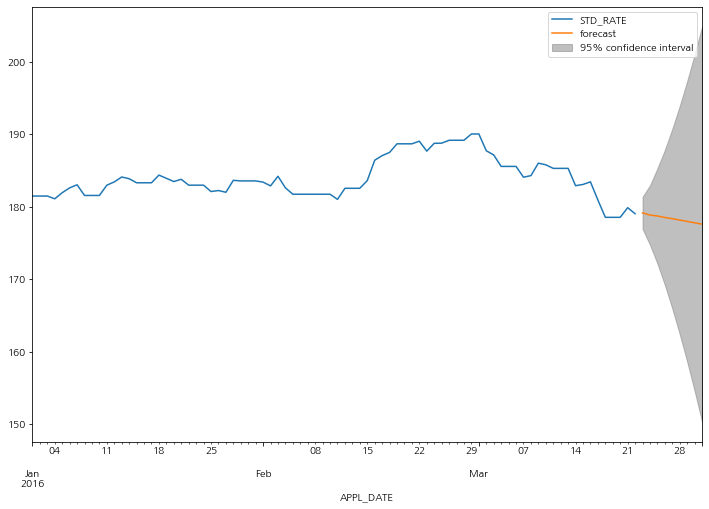

In [132]:
start_time = df_CNY_test.index.min()
end_time = df_CNY_test.index.max()
fig,ax= plt.subplots(figsize=(12,8))

ax = df_CNY_train.plot(ax = ax)

fig = ts_result_cny.plot_predict(start=start_time, end=end_time, ax=ax,plot_insample = False)

In [133]:
start_time = pd.to_datetime("2016-01-03")
y_pred = ts_result_cny.predict(start=start_time, end=end_time, typ='levels')
df_merge = df_CNY
df_merge["예측값"]=y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.477844
2016-01-04,181.10,181.476898
2016-01-05,181.94,180.883667


<AxesSubplot:xlabel='APPL_DATE'>

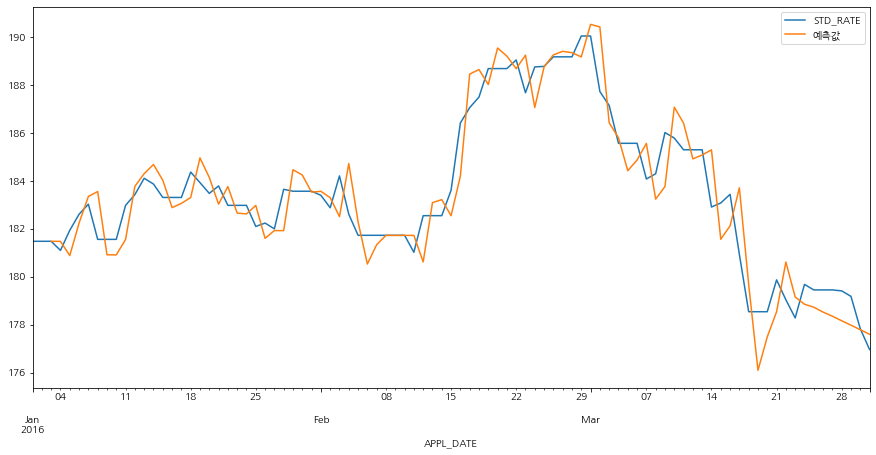

In [134]:
df_merge.plot(y=["STD_RATE","예측값"], figsize=(15,7))